<a href="https://colab.research.google.com/github/ab2gbl/Master2/blob/main/CSAI/TP/CSAI_Tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
Niter=100
Nbpop=50
w=1
c1=2
c2=2

In [2]:
import random
interval= {
    'F': (100,250),
    'S': (30,125),
    'B': (50,125),
    'L': (12,40)
}
def init_particle():
  F=random.randint(interval['F'][0],interval['F'][1])
  S=random.randint(interval['S'][0],interval['S'][1])
  B=random.randint(interval['B'][0],interval['B'][1])
  L=random.randint(interval['L'][0],interval['L'][1])
  #print(F,S,B,L)
  vL=random.uniform(-1,1)
  vF=random.uniform(-1,1)
  vS=random.uniform(-1,1)
  vB=random.uniform(-1,1)

  #print (vF,vS,vB,vL)
  return {'F':F,'S':S,'B':B,'L':L,'vF':vF,'vS':vS,'vB':vB,'vL':vL}

In [3]:
x1=init_particle()
x2=init_particle()
x3=init_particle()
print(x1,'\n',x2,'\n',x3)


{'F': 135, 'S': 67, 'B': 77, 'L': 22, 'vF': 0.3574248430876894, 'vS': 0.2101381091190173, 'vB': 0.5763987629923206, 'vL': 0.9913045421892395} 
 {'F': 114, 'S': 95, 'B': 95, 'L': 14, 'vF': 0.24479984455991066, 'vS': -0.29732294130923953, 'vB': 0.9178416541664529, 'vL': -0.763304482377162} 
 {'F': 165, 'S': 112, 'B': 121, 'L': 32, 'vF': -0.21739246029183912, 'vS': -0.92172058091413, 'vB': -0.04021404023903785, 'vL': -0.435793044543459}


In [4]:
def init_pop(n):
  pop=[]
  for i in range(n):
    pop.append(init_particle())
  return pop

In [5]:
pop=init_pop(3)
print(pop)

[{'F': 147, 'S': 66, 'B': 62, 'L': 28, 'vF': -0.01210713776268979, 'vS': -0.2801460036105885, 'vB': 0.11718719323768134, 'vL': -0.21432389327374013}, {'F': 191, 'S': 32, 'B': 93, 'L': 38, 'vF': -0.021563959090932228, 'vS': -0.5967786433480979, 'vB': 0.5672194915250133, 'vL': 0.3773552809849241}, {'F': 150, 'S': 61, 'B': 99, 'L': 32, 'vF': -0.10597207509713824, 'vS': -0.8568929862658203, 'vB': -0.3515912358848854, 'vL': -0.46862371035207606}]


In [6]:

import math
def g(x):
  F=x['F']
  S=x['S']
  B=x['B']
  L=x['L']
  g=(F**2+S**2+B**2+2*L**2)/(math.cos(F)*math.cos(S)*math.cos(B)*math.cos(L))
  return(g)

In [7]:
print(g(x1),g(x2),g(x3))

1853633.9528281072 696081.6765842044 45977780.14964498


In [8]:
def init_Pbest(pop):
  Pbest=[]
  for p in pop:
    Pbest.append({'F': p['F'], 'S': p['S'], 'B': p['B'], 'L': p['L'], 'fitness': g(p)})

  return Pbest


In [9]:
print(init_Pbest(pop))

[{'F': 147, 'S': 66, 'B': 62, 'L': 28, 'fitness': -61041.60410251723}, {'F': 191, 'S': 32, 'B': 93, 'L': 38, 'fitness': -241245.01087707668}, {'F': 150, 'S': 61, 'B': 99, 'L': 32, 'fitness': -6349886.154070066}]


Final Gbest: {'F': 250, 'S': 30, 'B': 61.26076453174817, 'L': 40, 'fitness': 9711163375.706953}


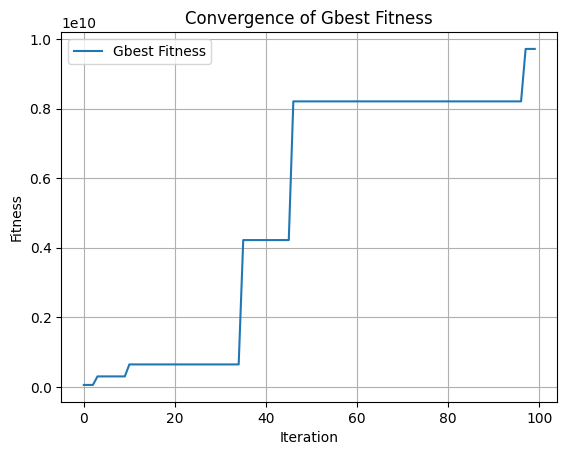

In [21]:
Diag = []
pop=init_pop(Nbpop)
Pbest=init_Pbest(pop)
Gbest = max(Pbest, key=lambda p: p['fitness'])
for i in range(Niter):
  for j in range(Nbpop):

    gx = g(pop[j])
    if gx > Pbest[j]['fitness']:
        Pbest[j] = {'F': pop[j]['F'], 'S': pop[j]['S'], 'B': pop[j]['B'], 'L': pop[j]['L'], 'fitness': gx}

    if gx > Gbest['fitness']:
        Gbest = {'F': pop[j]['F'], 'S': pop[j]['S'], 'B': pop[j]['B'], 'L': pop[j]['L'], 'fitness': gx}


  Diag.append(Gbest['fitness'])

  for j in range(Nbpop):
    variables = ['F', 'B', 'L', 'S']
    for var in variables:
      v=(w*pop[j][f'v{var}']+
        c1*random.uniform(0,1)*(Pbest[j][var]-pop[j][var])+
        c2*random.uniform(0,1)*(Gbest[var]-pop[j][var]))
      pop[j][f'v{var}']=v
      pop[j][var]+=v
      pop[j][var] = max(interval[var][0], min(interval[var][1], pop[j][var]))



print("Final Gbest:", Gbest)

import random
import matplotlib.pyplot as plt

# Plot Gbest fitness history
plt.plot(range(Niter), Diag, label="Gbest Fitness")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.title("Convergence of Gbest Fitness")
plt.legend()
plt.grid()
plt.show()

